<a href="https://colab.research.google.com/github/ElenirOliveira/Engenheiro.de.Dados/blob/main/DIO_NTTDATA_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando Spark e Python com PySpark para análise de dados
## DIO e NTT DATA - Maria Júlia Zabbal

# Operações básicas

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=905d91cb1813bdaef90dd94dc7ef74a87fc5d6a18ae215afd2a7a3500c63d1bc
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [ ]:
# Criar SparkSession
spark = SparkSession.builder.appName("Empresa").getOrCreate()

# Criar dataframe de pessoas
data = [
    (1, "Alice", 25, "F", 5),
    (2, "Bob", 30, "M", 5),
    (3, "Charlie", 28, "M", 3),
    (4, "David", 35, "M", 11),
    (5, "Eve", 22, "F", 10),
    (6, "Fiona", 29, "F", 5),
    (7, "George", 31, "M", 4),
    (8, "Helen", 27, "F", 3),
    (9, "Ian", 33, "M", 17),
    (10, "Jane", 26, "F", 18),
    (11, "Kevin", 34, "M", 2),
    (12, "Linda", 23, "F", 1),
    (13, "Mike", 32, "M", 9),
    (14, "Nancy", 28, "F", 8),
    (15, "Oliver", 36, "M", 6),
    (16, "Patricia", 24, "F", 13),
    (17, "Quentin", 31, "M", 15),
    (18, "Rachel", 29, "F", 16),
    (19, "Steve", 35, "M", 4),
    (20, "Tina", 27, "F", 4)
]
people_df = spark.createDataFrame(data, ["person_id", "name", "age", "gender", "job_id"])

# Criar dataframe de trabalhos
data = [
    (1, "Manager", 60000),
    (2, "Developer", 50000),
    (3, "Analyst", 45000),
    (4, "Designer", 55000),
    (5, "Tester", 40000),
    (6, "Sales Representative", 48000),
    (7, "Marketing Specialist", 52000),
    (8, "Accountant", 58000),
    (9, "HR Officer", 47000),
    (10, "Operations Manager", 62000),
    (11, "Project Manager", 65000),
    (12, "Data Scientist", 70000),
    (13, "Business Analyst", 53000),
    (14, "IT Support", 42000),
    (15, "Customer Service", 43000),
    (16, "Executive Assistant", 51000),
    (17, "Legal Counsel", 80000),
    (18, "Financial Analyst", 57000),
    (19, "Research Scientist", 75000),
    (20, "Trainee", 46000)
]
jobs_df = spark.createDataFrame(data, ["job_id", "job_title", "salary"])

# Show dataframes
people_df.show()
jobs_df.show()

+---------+--------+---+------+------+
|person_id|    name|age|gender|job_id|
+---------+--------+---+------+------+
|        1|   Alice| 25|     F|     5|
|        2|     Bob| 30|     M|     5|
|        3| Charlie| 28|     M|     3|
|        4|   David| 35|     M|    11|
|        5|     Eve| 22|     F|    10|
|        6|   Fiona| 29|     F|     5|
|        7|  George| 31|     M|     4|
|        8|   Helen| 27|     F|     3|
|        9|     Ian| 33|     M|    17|
|       10|    Jane| 26|     F|    18|
|       11|   Kevin| 34|     M|     2|
|       12|   Linda| 23|     F|     1|
|       13|    Mike| 32|     M|     9|
|       14|   Nancy| 28|     F|     8|
|       15|  Oliver| 36|     M|     6|
|       16|Patricia| 24|     F|    13|
|       17| Quentin| 31|     M|    15|
|       18|  Rachel| 29|     F|    16|
|       19|   Steve| 35|     M|     4|
|       20|    Tina| 27|     F|     4|
+---------+--------+---+------+------+

+------+--------------------+------+
|job_id|           job_tit

In [ ]:
# Selecionar colunas
people_df.select("name", "age").show()

+--------+---+
|    name|age|
+--------+---+
|   Alice| 25|
|     Bob| 30|
| Charlie| 28|
|   David| 35|
|     Eve| 22|
|   Fiona| 29|
|  George| 31|
|   Helen| 27|
|     Ian| 33|
|    Jane| 26|
|   Kevin| 34|
|   Linda| 23|
|    Mike| 32|
|   Nancy| 28|
|  Oliver| 36|
|Patricia| 24|
| Quentin| 31|
|  Rachel| 29|
|   Steve| 35|
|    Tina| 27|
+--------+---+



In [ ]:
# Filtrar dados
people_df.filter(col("age") > 30).select("name", "age").show()

+---------+-------+---+------+------+
|person_id|   name|age|gender|job_id|
+---------+-------+---+------+------+
|        4|  David| 35|     M|    11|
|        7| George| 31|     M|     4|
|        9|    Ian| 33|     M|    17|
|       11|  Kevin| 34|     M|     2|
|       13|   Mike| 32|     M|     9|
|       15| Oliver| 36|     M|     6|
|       17|Quentin| 31|     M|    15|
|       19|  Steve| 35|     M|     4|
+---------+-------+---+------+------+



In [ ]:
# Agrupar e agregar dados
people_df.groupBy("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|   10|
|     M|   10|
+------+-----+



In [ ]:
# Ordenar dados
people_df.orderBy("age", ascending=False).show()

+---------+--------+---+------+------+
|person_id|    name|age|gender|job_id|
+---------+--------+---+------+------+
|       15|  Oliver| 36|     M|     6|
|        4|   David| 35|     M|    11|
|       19|   Steve| 35|     M|     4|
|       11|   Kevin| 34|     M|     2|
|        9|     Ian| 33|     M|    17|
|       13|    Mike| 32|     M|     9|
|        7|  George| 31|     M|     4|
|       17| Quentin| 31|     M|    15|
|        2|     Bob| 30|     M|     5|
|       18|  Rachel| 29|     F|    16|
|        6|   Fiona| 29|     F|     5|
|       14|   Nancy| 28|     F|     8|
|        3| Charlie| 28|     M|     3|
|       20|    Tina| 27|     F|     4|
|        8|   Helen| 27|     F|     3|
|       10|    Jane| 26|     F|    18|
|        1|   Alice| 25|     F|     5|
|       16|Patricia| 24|     F|    13|
|       12|   Linda| 23|     F|     1|
|        5|     Eve| 22|     F|    10|
+---------+--------+---+------+------+



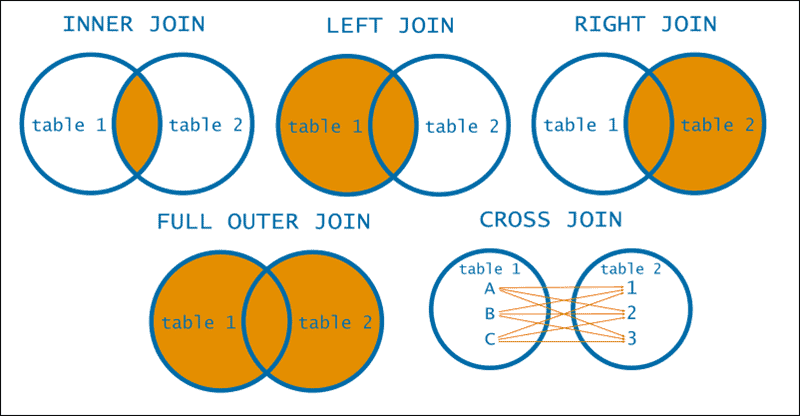

In [ ]:
# Juntar DataFrames
people_df.alias('dfp').join(jobs_df.alias('dfj'), col('dfp.job_id') == col('dfj.job_id'), "inner").show()

+------+---------+--------+---+------+--------------------+------+
|job_id|person_id|    name|age|gender|           job_title|salary|
+------+---------+--------+---+------+--------------------+------+
|     1|       12|   Linda| 23|     F|             Manager| 60000|
|     2|       11|   Kevin| 34|     M|           Developer| 50000|
|     3|        3| Charlie| 28|     M|             Analyst| 45000|
|     3|        8|   Helen| 27|     F|             Analyst| 45000|
|     4|        7|  George| 31|     M|            Designer| 55000|
|     4|       19|   Steve| 35|     M|            Designer| 55000|
|     4|       20|    Tina| 27|     F|            Designer| 55000|
|     5|        1|   Alice| 25|     F|              Tester| 40000|
|     5|        2|     Bob| 30|     M|              Tester| 40000|
|     5|        6|   Fiona| 29|     F|              Tester| 40000|
|     6|       15|  Oliver| 36|     M|Sales Representative| 48000|
|     8|       14|   Nancy| 28|     F|          Accountant| 58

In [ ]:
# Adicionar novas colunas
people_df.withColumn("age_plus_10", col('age') + 10).show()

+---------+--------+---+------+------+-----------+
|person_id|    name|age|gender|job_id|age_plus_10|
+---------+--------+---+------+------+-----------+
|        1|   Alice| 25|     F|     5|         35|
|        2|     Bob| 30|     M|     5|         40|
|        3| Charlie| 28|     M|     3|         38|
|        4|   David| 35|     M|    11|         45|
|        5|     Eve| 22|     F|    10|         32|
|        6|   Fiona| 29|     F|     5|         39|
|        7|  George| 31|     M|     4|         41|
|        8|   Helen| 27|     F|     3|         37|
|        9|     Ian| 33|     M|    17|         43|
|       10|    Jane| 26|     F|    18|         36|
|       11|   Kevin| 34|     M|     2|         44|
|       12|   Linda| 23|     F|     1|         33|
|       13|    Mike| 32|     M|     9|         42|
|       14|   Nancy| 28|     F|     8|         38|
|       15|  Oliver| 36|     M|     6|         46|
|       16|Patricia| 24|     F|    13|         34|
|       17| Quentin| 31|     M|

In [ ]:
# Renomear colunas
people_df = people_df.withColumnRenamed("age_plus_10", "new_age")
people_df.show()

+---------+--------+---+------+------+-------+
|person_id|    name|age|gender|job_id|new_age|
+---------+--------+---+------+------+-------+
|        1|   Alice| 25|     F|     5|     35|
|        2|     Bob| 30|     M|     5|     40|
|        3| Charlie| 28|     M|     3|     38|
|        4|   David| 35|     M|    11|     45|
|        5|     Eve| 22|     F|    10|     32|
|        6|   Fiona| 29|     F|     5|     39|
|        7|  George| 31|     M|     4|     41|
|        8|   Helen| 27|     F|     3|     37|
|        9|     Ian| 33|     M|    17|     43|
|       10|    Jane| 26|     F|    18|     36|
|       11|   Kevin| 34|     M|     2|     44|
|       12|   Linda| 23|     F|     1|     33|
|       13|    Mike| 32|     M|     9|     42|
|       14|   Nancy| 28|     F|     8|     38|
|       15|  Oliver| 36|     M|     6|     46|
|       16|Patricia| 24|     F|    13|     34|
|       17| Quentin| 31|     M|    15|     41|
|       18|  Rachel| 29|     F|    16|     39|
|       19|  

In [ ]:
# Funções de agregação
people_df.agg(avg("age").alias("avg_age")).show()

+--------+
|avg(age)|
+--------+
|   29.25|
+--------+



In [ ]:
people_df.groupBy("gender").agg(avg("age")).show()

+------+--------+
|gender|avg(age)|
+------+--------+
|     F|    26.0|
|     M|    32.5|
+------+--------+



In [ ]:
# Funções de string
people_df.select(upper("name").alias("name")).show()
people_df.withColumn("name", upper(col("name")))

+-----------+
|upper(name)|
+-----------+
|      ALICE|
|        BOB|
|    CHARLIE|
|      DAVID|
|        EVE|
|      FIONA|
|     GEORGE|
|      HELEN|
|        IAN|
|       JANE|
|      KEVIN|
|      LINDA|
|       MIKE|
|      NANCY|
|     OLIVER|
|   PATRICIA|
|    QUENTIN|
|     RACHEL|
|      STEVE|
|       TINA|
+-----------+



# Outras possibilidades

In [ ]:
spark.read.table("path")
spark.write().mode().option()

# Criar uma view temporária
people_df.createOrReplaceTempView("people")
jobs_df.createOrReplaceTempView("jobs")

# Usar Spark SQL para consultar dados
result_df = spark.sql("SELECT p.name, j.job_title FROM people p JOIN jobs j ON p.job_id = j.job_id WHERE p.age > 30")
result_df.show()

+-------+--------------------+
|   name|           job_title|
+-------+--------------------+
|  Kevin|           Developer|
| George|            Designer|
|  Steve|            Designer|
| Oliver|Sales Representative|
|   Mike|          HR Officer|
|  David|     Project Manager|
|Quentin|    Customer Service|
|    Ian|       Legal Counsel|
+-------+--------------------+



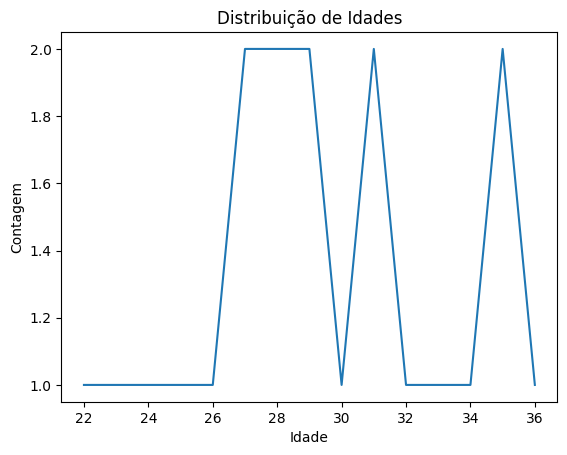

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por idade e contar o número de pessoas
age_counts = people_df.groupBy("age").count().orderBy("age").collect()

# Extrair as idades e as contagens
ages = [row["age"] for row in age_counts]
counts = [row["count"] for row in age_counts]

# Criar o gráfico
plt.plot(ages, counts)
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Distribuição de Idades")
plt.show()

# Um pouco mais sobre o spark

In [ ]:
# Lazy Evaluation:
# Em Spark, a avaliação preguiçosa significa que as operações no DataFrame não são executadas imediatamente.
# Em vez disso, um plano de execução é criado e as operações são executadas apenas quando uma ação é chamada.
# Isso permite otimizar o processo de consulta, pois o Spark pode otimizar o plano de execução antes de executar as operações.

# Exemplo:
# Criando um DataFrame com uma transformação de filtro.
filtered_df = people_df.filter(people_df["age"] > 30)

# A operação de filtro não é executada imediatamente.
# O Spark cria um plano de execução para essa operação.

# Agora, chamando uma ação para executar o plano de execução.
filtered_df.show()

# Diferença entre Ação e Transformação:

# Transformação:
# - Cria um novo DataFrame a partir do DataFrame existente.
# - Não executa a operação imediatamente.
# - Exemplos: filter, select, join, orderBy.

# Ação:
# - Executa a operação e retorna um resultado.
# - Exemplos: show, count, collect, write.


+---------+-------+---+------+------+-------+
|person_id|   name|age|gender|job_id|new_age|
+---------+-------+---+------+------+-------+
|        4|  David| 35|     M|    11|     45|
|        7| George| 31|     M|     4|     41|
|        9|    Ian| 33|     M|    17|     43|
|       11|  Kevin| 34|     M|     2|     44|
|       13|   Mike| 32|     M|     9|     42|
|       15| Oliver| 36|     M|     6|     46|
|       17|Quentin| 31|     M|    15|     41|
|       19|  Steve| 35|     M|     4|     45|
+---------+-------+---+------+------+-------+



In [ ]:
# Utilize o método `explain()` para visualizar o plano de execução de uma consulta.
# Isso ajuda a entender como o Spark está otimizando a consulta.
filtered_df = people_df.filter(people_df["age"] > 30)
filtered_df.explain()

# Utilize o método `withColumn()` para adicionar novas colunas a um DataFrame.
# Utilize nomes de colunas descritivos e consistentes.
people_df = (
    people_df.withColumn(
        "age_category",
        when(col("age") < 30, "Jovem")
        .when((col("age") >= 30) & (col("age") < 50), "Adulto")
        .otherwise("Idoso")
    )
)
people_df.show()

# Utilize o método `filter()` para filtrar linhas em um DataFrame.
# Utilize condições claras e precisas para filtrar os dados.
filtered_df = people_df.filter((col("age") > 25) & (col("gender") == "F"))

# Utilize o método `drop()` para remover colunas de um DataFrame.
# Remova colunas que não são mais necessárias.
dropped_df = people_df.drop("new_age")

# Utilize o método `distinct()` para remover linhas duplicadas de um DataFrame.
distinct_df = people_df.distinct()

== Physical Plan ==
*(1) Project [person_id#0L, name#1, age#2L, gender#3, job_id#4L, (age#2L + 10) AS new_age#204L]
+- *(1) Filter (isnotnull(age#2L) AND (age#2L > 30))
   +- *(1) Scan ExistingRDD[person_id#0L,name#1,age#2L,gender#3,job_id#4L]


+---------+--------+---+------+------+-------+------------+
|person_id|    name|age|gender|job_id|new_age|age_category|
+---------+--------+---+------+------+-------+------------+
|        1|   Alice| 25|     F|     5|     35|       Jovem|
|        2|     Bob| 30|     M|     5|     40|      Adulto|
|        3| Charlie| 28|     M|     3|     38|       Jovem|
|        4|   David| 35|     M|    11|     45|      Adulto|
|        5|     Eve| 22|     F|    10|     32|       Jovem|
|        6|   Fiona| 29|     F|     5|     39|       Jovem|
|        7|  George| 31|     M|     4|     41|      Adulto|
|        8|   Helen| 27|     F|     3|     37|       Jovem|
|        9|     Ian| 33|     M|    17|     43|      Adulto|
|       10|    Jane| 26|     F|   

# Desafios

In [ ]:
# Desafio 1:
# Encontre a idade máxima das pessoas do sexo feminino.

# Desafio 2:
# Crie uma nova coluna chamada "salary_category" no dataframe "people_df" que categorize o salário
# em "Baixo" para salários menores que 55000, "Médio" para salários entre 55000 e 65000 e "Alto" para salários maiores que 65000.
# Utilize a coluna "job_id" para fazer a junção com o dataframe "jobs_df" e obter o salário.